## Modelo de Leontief

* Leontief’s input-output model supports economists in understanding interdependencies between different sectors or countries. 

* The model consists of a table showing flows between inputs and outputs, which inadvertently also exhibits technological requirements for sectors, giving the input-output table the designation of “technology matrix”.

* Through coefficients of intermediary products required by unit of a sector, the technology matrix allows to compute utilization of outputs as inputs. 


As sectors are co-dependent where they need more of themselves and other sectors, production can be broken-down into three parts:

* Proportion of a sector used to produce more of that sector
* Proportion of other sectors used to produce more of that sector
* Proportion of a sector used for final demand and trade

To illustrate this co-dependence, we can use an economy consisting of two sectors: electricity and petroleum. The electricity sector requires electricity and petroleum to generate more electricity. It also has leftover electricity which can be used in the petroleum sector, which in turn also requires more petroleum to generate leftover petroleum to be used in the electricity sector.

We illustrate the Leontief input-output model with the following example:

| From/To | Electricidad | Petróleo | Demanda Final | Producto total |
| --- | --- | --- | ---| --- |
| Electricidad | 350  | 400 | 4250 | 5000 |
| Petróleo | 275 | 100 | 9625 | 10000 |




Referencia : https://peter-puszko.medium.com/solving-leontiefs-input-output-model-in-python-a0a29455b2d8

Para calcular la matriz de coeficientes técnicos, tenemos que dividir el insumo de $i$ consumido por cada actividad $j$ entre el total producido de la actividad $j$.

Usando notación de álgebra lineal, tenemos :

$$
Z=\begin{bmatrix}
350 & 400\\
275 & 100 
\end{bmatrix}
$$

$$
X = \begin{bmatrix}
5000 \\
10000
\end{bmatrix}
$$

Donde $Z$ es la matriz de flujo entre sectores y $X$ es el vector de producto total.

La matriz de coeficientes técnicos se calcularía como:


$$
A= Z \cdot (X \cdot I)^{-1}
$$

In [3]:
### La matriz Z
import numpy as np

Z = np.array([[350,400],[275,100]])

X = np.array([5000,10000])

A = Z.dot(np.linalg.inv(X*np.identity(2)))
A

array([[0.07 , 0.04 ],
       [0.055, 0.01 ]])

Las entradas de la matriz $A$ definen los coeficientes técnicos como la proporción de insumo ofrecido por el sector $i$ y comprado por el sector $j$ con respecto al producto total del sector $j$, $a_{ij}= \dfrac{z_{ij}}{x_j}$ 

En términos matriciales, la producción se define como :

$$
X = (I-A)^{-1} \cdot \mathbf{f}= L \cdot \mathbf{f}
$$

Donde $\mathbf{f}$ es el vector de demanda final, y $L=(I-A)^{-1}$ es una matriz conocida como la *inversa de Leontief* o matriz de requerimientos totales.

Calculemos la matriz $L$:

In [10]:
L = np.linalg.inv(np.identity(2)-A)
L


array([[1.07784431, 0.04354927],
       [0.05988024, 1.01252041]])

Cada entrada $a_{ij}$ de la inversa de Leontief representa la cantidad de producción que debería realizar un sector $i$ para satisfacer una unidad de demanda final de un producto $j$.

Ahora obtengamos la producción total:

In [12]:
f = np.array([4250,9625])
L.dot(f)

array([ 5000., 10000.])

## MIP de México 2018

In [50]:
import pandas as pd
import os

os.chdir("datos")

mip = pd.read_excel("mip_pcr_ixi_t_2016.xlsx", index_col=None, na_values=['-'],header =0, skiprows=4, nrows=258,usecols = "B:IY")

In [51]:
mip

,"1111 - Cultivo de semillas oleaginosas, leguminosas y cereales",1112 - Cultivo de hortalizas,1113 - Cultivo de frutales y nueces,"1114 - Cultivo en invernaderos y viveros, y floricultura",1119 - Otros cultivos,1121 - Explotación de bovinos,1122 - Explotación de porcinos,1123 - Explotación avícola,1124 - Explotación de ovinos y caprinos,1125 - Acuicultura,...,"8132 - Asociaciones y organizaciones religiosas, políticas y civiles",8141 - Hogares con empleados domésticos,9311 - Órganos legislativos,9312 - Administración pública en general,9313 - Regulación y fomento del desarrollo económico,9314 - Impartición de justicia y mantenimiento de la seguridad y el orden público,9315 - Regulación y fomento de actividades para mejorar y preservar el medio ambiente,"9316,9321 - Actividades administrativas de instituciones de bienestar social y organismos internacionales",9317 - Relaciones exteriores,9318 - Actividades de seguridad nacional
0,4996.216953,0.000000,0.0,30.427201,0.00000,16014.508897,6249.631142,11261.386321,209.413956,0.0,...,0.0,0,0.0,0.0,0.0,4.296722,0.0,0.0,0.0,1.812728
1,0.000000,1095.054658,0.0,0.000000,0.00000,0.000000,0.000000,0.086036,0.000000,0.0,...,0.0,0,0.0,0.0,0.0,2.881220,0.0,0.0,0.0,4.448474
2,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0,0.0,0.0,0.0,3.210516,0.0,0.0,0.0,3.366440
3,0.000000,0.000000,0.0,724.308189,0.00000,0.000000,0.000000,0.092394,0.000000,0.0,...,0.0,0,0.0,0.0,0.0,0.159396,0.0,0.0,0.0,0.178966
4,1873.815297,4068.025697,0.0,317.301836,3455.15781,35425.743124,0.000000,0.000000,442.905974,0.0,...,0.0,0,0.0,0.0,0.0,0.382350,0.0,0.0,0.0,0.213295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
254,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
255,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
256,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000


In [66]:
import re

ramas_dict = {re.findall(r'^\D*(\d+)', rama)[0]:rama[7:] for rama in mip.columns}
ramas_dict

{'1111': 'Cultivo de semillas oleaginosas, leguminosas y cereales',
 '1112': 'Cultivo de hortalizas',
 '1113': 'Cultivo de frutales y nueces',
 '1114': 'Cultivo en invernaderos y viveros, y floricultura',
 '1119': 'Otros cultivos',
 '1121': 'Explotación de bovinos',
 '1122': 'Explotación de porcinos',
 '1123': 'Explotación avícola',
 '1124': 'Explotación de ovinos y caprinos',
 '1125': 'Acuicultura',
 '1129': 'Explotación de otros animales',
 '1131': 'Silvicultura',
 '1132': 'Viveros forestales y recolección de productos forestales',
 '1133': 'Tala de árboles',
 '1141': 'Pesca',
 '1142': 'Caza y captura',
 '1151': 'Servicios relacionados con la agricultura',
 '1152': 'Servicios relacionados con la cría y explotación de animales',
 '1153': 'Servicios relacionados con el aprovechamiento forestal',
 '2111': 'Extracción de petróleo y gas',
 '2121': 'Minería de carbón mineral',
 '2122': 'Minería de minerales metálicos',
 '2123': 'Minería de minerales no metálicos',
 '2131': 'Servicios relac

In [69]:
## Convertimos el data frame en la matriz Z
Z = mip.to_numpy()
Z

array([[4.99621695e+03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.81272819e+00],
       [0.00000000e+00, 1.09505466e+03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 4.44847408e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.36644048e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [75]:
## Obtenemos el vector de producción total
mip_vbp = pd.read_excel("/home/milo/Datos/MIP_mx/2016/mip_pcr_ixi_t_2016.xlsx", index_col=None, na_values=['-'],header =0, skiprows=4, nrows=258,usecols = "JH")
X = mip_vbp.to_numpy()
X

array([[1.75833582e+05],
       [9.44294370e+04],
       [1.22131536e+05],
       [6.09531640e+04],
       [1.04454533e+05],
       [2.09668269e+05],
       [5.22210350e+04],
       [1.54061724e+05],
       [7.23844500e+03],
       [1.19832790e+04],
       [2.85080300e+03],
       [1.85256000e+02],
       [9.97829000e+03],
       [1.64453740e+04],
       [3.09219480e+04],
       [5.25178000e+02],
       [2.56676200e+03],
       [1.87911000e+02],
       [1.19862400e+03],
       [5.37596747e+05],
       [1.47670640e+04],
       [2.21985146e+05],
       [8.85866490e+04],
       [1.68831477e+05],
       [3.75794355e+05],
       [1.11311882e+05],
       [2.76325600e+03],
       [1.16171005e+06],
       [5.52612443e+05],
       [2.24702726e+05],
       [1.02085589e+05],
       [1.95135162e+05],
       [5.46392100e+04],
       [2.52508751e+05],
       [1.03925773e+05],
       [1.91077110e+05],
       [1.39715198e+05],
       [9.52338120e+04],
       [1.99052011e+05],
       [5.89100972e+05],


In [76]:
## Calculamos la matriz de coefientes técnicos A
A = Z.dot(np.linalg.inv(X*np.identity(X.shape[0])))
A

array([[2.84144638e-02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.45112851e-05],
       [0.00000000e+00, 1.15965391e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 6.01512223e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 4.55202179e-05],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [77]:
## Calculamos la inversa de Leontief
L = np.linalg.inv(np.identity(A.shape[0])-A)
L

array([[1.03000477e+00, 8.73129658e-04, 1.29835520e-03, ...,
        9.56502281e-04, 8.44828655e-04, 5.47709243e-03],
       [1.82494548e-05, 1.01175681e+00, 1.93351959e-05, ...,
        8.51606348e-05, 1.13415134e-04, 2.84855265e-04],
       [9.73348672e-05, 1.06803830e-04, 1.00008127e+00, ...,
        1.32706385e-04, 1.46828569e-04, 4.50072461e-04],
       ...,
       [1.49199176e-05, 1.25243899e-05, 1.17803979e-05, ...,
        1.00001892e+00, 1.61753931e-05, 4.04158854e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

## De MIP a una Red Dirigida Pesada

Referencia: https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_numpy_matrix.html

In [148]:
import networkx as nx
temp = nx.DiGraph()
G = nx.from_numpy_matrix(Z, parallel_edges=True, create_using=temp)

In [149]:
mip

,"1111 - Cultivo de semillas oleaginosas, leguminosas y cereales",1112 - Cultivo de hortalizas,1113 - Cultivo de frutales y nueces,"1114 - Cultivo en invernaderos y viveros, y floricultura",1119 - Otros cultivos,1121 - Explotación de bovinos,1122 - Explotación de porcinos,1123 - Explotación avícola,1124 - Explotación de ovinos y caprinos,1125 - Acuicultura,...,"8132 - Asociaciones y organizaciones religiosas, políticas y civiles",8141 - Hogares con empleados domésticos,9311 - Órganos legislativos,9312 - Administración pública en general,9313 - Regulación y fomento del desarrollo económico,9314 - Impartición de justicia y mantenimiento de la seguridad y el orden público,9315 - Regulación y fomento de actividades para mejorar y preservar el medio ambiente,"9316,9321 - Actividades administrativas de instituciones de bienestar social y organismos internacionales",9317 - Relaciones exteriores,9318 - Actividades de seguridad nacional
0,4996.216953,0.000000,0.0,30.427201,0.00000,16014.508897,6249.631142,11261.386321,209.413956,0.0,...,0.0,0,0.0,0.0,0.0,4.296722,0.0,0.0,0.0,1.812728
1,0.000000,1095.054658,0.0,0.000000,0.00000,0.000000,0.000000,0.086036,0.000000,0.0,...,0.0,0,0.0,0.0,0.0,2.881220,0.0,0.0,0.0,4.448474
2,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0,0.0,0.0,0.0,3.210516,0.0,0.0,0.0,3.366440
3,0.000000,0.000000,0.0,724.308189,0.00000,0.000000,0.000000,0.092394,0.000000,0.0,...,0.0,0,0.0,0.0,0.0,0.159396,0.0,0.0,0.0,0.178966
4,1873.815297,4068.025697,0.0,317.301836,3455.15781,35425.743124,0.000000,0.000000,442.905974,0.0,...,0.0,0,0.0,0.0,0.0,0.382350,0.0,0.0,0.0,0.213295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
254,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
255,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
256,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000


In [150]:
for vecinos in G.neighbors(0):
    print(vecinos)

0
3
5
6
7
8
10
28
29
34
35
36
37
38
39
40
41
42
43
59
101
119
198
200
202
212
214
235
237
253
257


In [151]:
G.out_edges(0)

OutEdgeDataView([(0, 0), (0, 3), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 28), (0, 29), (0, 34), (0, 35), (0, 36), (0, 37), (0, 38), (0, 39), (0, 40), (0, 41), (0, 42), (0, 43), (0, 59), (0, 101), (0, 119), (0, 198), (0, 200), (0, 202), (0, 212), (0, 214), (0, 235), (0, 237), (0, 253), (0, 257)])

In [152]:
G.in_edges(0)

InEdgeDataView([(0, 0), (4, 0), (9, 0), (14, 0), (16, 0), (20, 0), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (27, 0), (28, 0), (29, 0), (30, 0), (31, 0), (32, 0), (33, 0), (34, 0), (35, 0), (36, 0), (37, 0), (38, 0), (39, 0), (40, 0), (41, 0), (42, 0), (43, 0), (44, 0), (45, 0), (46, 0), (47, 0), (48, 0), (49, 0), (50, 0), (51, 0), (52, 0), (53, 0), (54, 0), (55, 0), (56, 0), (57, 0), (58, 0), (59, 0), (60, 0), (61, 0), (62, 0), (63, 0), (64, 0), (65, 0), (66, 0), (67, 0), (68, 0), (69, 0), (70, 0), (71, 0), (72, 0), (73, 0), (74, 0), (75, 0), (76, 0), (77, 0), (78, 0), (79, 0), (80, 0), (81, 0), (82, 0), (83, 0), (84, 0), (85, 0), (86, 0), (87, 0), (88, 0), (89, 0), (90, 0), (91, 0), (92, 0), (93, 0), (94, 0), (95, 0), (96, 0), (97, 0), (98, 0), (99, 0), (100, 0), (101, 0), (102, 0), (103, 0), (104, 0), (105, 0), (106, 0), (107, 0), (108, 0), (109, 0), (110, 0), (111, 0), (112, 0), (113, 0), (114, 0), (115, 0), (116, 0), (117, 0), (118, 0), (119, 0), (120, 0), (121, 0), (122, 0), (

In [153]:
def posicion_rama(rama):
    return list(ramas_dict.keys()).index(rama)

## Agregamos las etiquetas de las ramas a la red
ramas_label = {posicion_rama(rama):rama for rama in ramas_dict.keys()}


In [155]:
ramas_dict

{'1111': 'Cultivo de semillas oleaginosas, leguminosas y cereales',
 '1112': 'Cultivo de hortalizas',
 '1113': 'Cultivo de frutales y nueces',
 '1114': 'Cultivo en invernaderos y viveros, y floricultura',
 '1119': 'Otros cultivos',
 '1121': 'Explotación de bovinos',
 '1122': 'Explotación de porcinos',
 '1123': 'Explotación avícola',
 '1124': 'Explotación de ovinos y caprinos',
 '1125': 'Acuicultura',
 '1129': 'Explotación de otros animales',
 '1131': 'Silvicultura',
 '1132': 'Viveros forestales y recolección de productos forestales',
 '1133': 'Tala de árboles',
 '1141': 'Pesca',
 '1142': 'Caza y captura',
 '1151': 'Servicios relacionados con la agricultura',
 '1152': 'Servicios relacionados con la cría y explotación de animales',
 '1153': 'Servicios relacionados con el aprovechamiento forestal',
 '2111': 'Extracción de petróleo y gas',
 '2121': 'Minería de carbón mineral',
 '2122': 'Minería de minerales metálicos',
 '2123': 'Minería de minerales no metálicos',
 '2131': 'Servicios relac

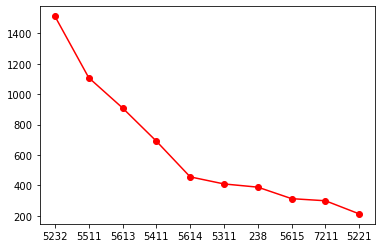

In [164]:
## Generamos un data frame para ver las ramas suministran insumos a una rama
## Obtenemos los pesos de las aristas de entrada 
import matplotlib.pyplot as plt

in_nodo = []
in_weight = []

for x in G.in_edges(posicion_rama('5231')):
    in_weight.append(G[x[0]][x[1]]["weight"])
    in_nodo.append(list(ramas_dict.keys())[x[0]])
    
in_df = pd.DataFrame({'Nodo' :in_nodo, 'Peso' : in_weight}).sort_values(by=['Peso'], ascending=False)

plt.plot(in_df['Nodo'][0:10], in_df['Peso'][0:10], 'ro-')
plt.savefig("in_weight_5231.png")
plt.show()
